**Task-1: To Explore Supervised Machine Learning**

>Predict the percentage of an student based on the no. of study hours using python


---


> **Done by Meet Joshi**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Loading dataset:**

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.shape

(25, 2)

**Gives the relation between Independent and Target Variable:**


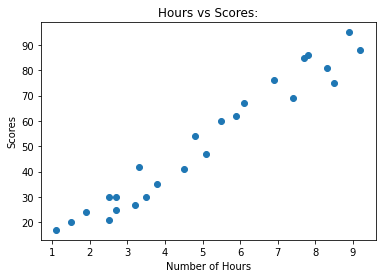

In [ ]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores:")
plt.show()

**Training and testing the data after splitting:**




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Hours'].values.reshape(-1,1), df['Scores'], test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

**Training the Linear Regression Model:**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting the predicted Line:**

In [ ]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (df['Hours'].values * coefficient) + intercept

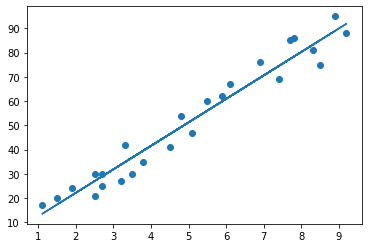

In [ ]:
plt.scatter(df.Hours, df.Scores)
plt.plot(df.Hours, line)
plt.show()

In [ ]:
pred = model.predict(X_test)
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

**Side by side Comparison of predicted values with original values:**

In [ ]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


**Model evaluation:**

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error is: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error is: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error is: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score is: ", metrics.r2_score(y_test, pred))

Mean Absolute Error is:  3.9207511902099244
Mean Squared Error is:  18.943211722315272
Root Mean Squared Error is:  4.352380006653288
R2 Score is:  0.9678055545167994


**Predicted value:**

In [ ]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"If a student study for 9.25 hrs in a day, {model.predict(hours)[0]} will be predicted score ")

If a student study for 9.25 hrs in a day, 92.38611528261494 will be predicted score 
